# Prova

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t = np.array([0,1,2,3,4,5,6,7,8,9,10])
ht = np.array([5.0,4.96,4.78,4.53,4.19,3.72,3.18,2.55,1.77,1.01,0.00])

In [14]:
def line(x,y):
    left = np.array([[np.sum(x*x), np.sum(x)],
                    [np.sum(x), x.shape[0]]])
    print (left)
    right = np.array([[np.sum(x*y)], 
                      [np.sum(y)]])
    
    print (right)
    [a, b] = np.linalg.solve(left,right)
    return [a,b]

[[385  55]
 [ 55  11]]
[[ 123.65]
 [  35.69]]
-0.498182 5.735455


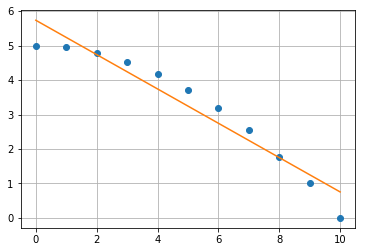

In [15]:
[a,b] = line(t, ht)
f = a * t + b
plt.grid(True)
plt.plot(t, ht, 'o')
plt.plot(t, f)
print ('%.6f %.6f' %(a,b))

In [43]:
def mmq(x, y, f):
    F = np.ones((len(x), len(f)))
    
    for j in range(len(f)):
        F[:,j] = f[j](x)

    left = np.dot(F.transpose(), F)
    right = np.dot(F.transpose(), y)
    C = np.linalg.solve(left,right)
    print(left, '*', C, '=', right)
    return C

3
[[ 25333.  22308.  18513.]
 [ 22308.  19668.  16368.]
 [ 18513.  16368.  13717.]] * [ 2.56321678 -5.0174359   2.50286713] = [-659.41 -535.76 -340.73]


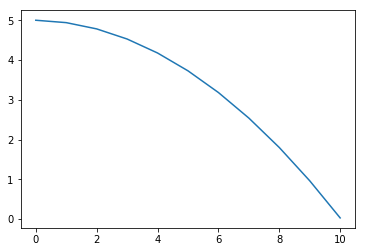

In [45]:
def f0(x):
    return -x**2
def f1(x):
    return -x**2 + x
def f2(x):
    return -x**2 + 2 * x + 2

f = [f0, f1, f2]
print (len(f))
C = mmq(t,ht,f)
fx = np.zeros(len(t))

for j in range(len(f)):
    fx = fx + C[j] * f[j](t)
plt.plot(t,fx)

In [76]:
def f(x):
    return x**2 + 2 * x + 3

def f_1(x):
    return 2 * x + 2

def f_2(x):
    return 2



In [77]:
def newton(x0, xtol):
    xi = x0
    while True:
        xi = xi - (f_1(xi) / f_2(xi))
        print(xi, f_1(xi))
        if abs(f_1(xi)) < xtol:
            break
        elif abs(f_1(xi)) == 0:
            break
    return xi

In [78]:
print(newton(-10, 0.001))

-1.0 0.0
-1.0


In [110]:
def biss(A, B, x_ant, p, y_tol = 0.0, x_tol = 0.0):
    xi = (A*f(B) - B*f(A)) / (f(B) - f(A))
    p.push(xi)
    condition = f(A)*f(xi)
    
    if abs(f(xi)) < y_tol:
        return f(xi)
    elif abs(x_ant - xi) < x_tol:
        return f(xi)
    
    x_ant = xi
    
    if condition < 0:
        return biss(A, xi, x_ant, p)
    elif condition > 0:
        return biss(xi, B, x_ant, p)
    else:
        return (xi,p)

AttributeError: 'numpy.ndarray' object has no attribute 'push'

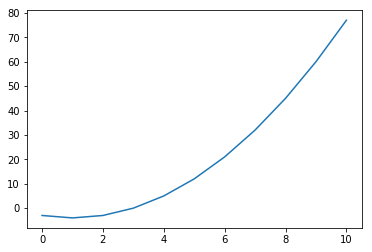

In [111]:
def f(x):
    return x**2 - 2 * x - 3
p = np.array([])
plt.plot(t,f(t))
print(biss(0, 10, 0, p))